In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
import yfinance as yf

data = yf.download(tickers = "GC=F", start="2017-12-01", end="2023-06-16", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,1274.099976,1288.599976,1271.000000,1278.800049,1278.800049,823
2017-12-04,1272.500000,1276.099976,1270.300049,1274.300049,1274.300049,850
2017-12-05,1275.400024,1275.800049,1260.000000,1261.599976,1261.599976,1499
2017-12-06,1264.900024,1267.800049,1261.599976,1262.800049,1262.800049,373
2017-12-07,1262.300049,1262.400024,1243.900024,1249.800049,1249.800049,358
...,...,...,...,...,...,...
2023-06-09,1965.099976,1969.800049,1960.300049,1962.199951,1962.199951,49
2023-06-12,1959.699951,1963.500000,1951.400024,1955.300049,1955.300049,212
2023-06-13,1960.599976,1967.500000,1940.300049,1944.599976,1944.599976,343


In [4]:
data = data.reset_index('Date', inplace=False)

In [5]:
df = data

In [6]:
df1=df.reset_index()['Close']

In [7]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [9]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [12]:
# 8. Define RNN Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 2s 51ms/step - loss: 0.0225 - val_loss: 0.0027
Epoch 2/100
14/14 [==============================] - 0s 26ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 3/100
14/14 [==============================] - 0s 25ms/step - loss: 9.9425e-04 - val_loss: 8.7379e-04
Epoch 4/100
14/14 [==============================] - 0s 26ms/step - loss: 8.4663e-04 - val_loss: 9.7369e-04
Epoch 5/100
14/14 [==============================] - 0s 30ms/step - loss: 8.0652e-04 - val_loss: 9.9749e-04
Epoch 6/100
14/14 [==============================] - 0s 31ms/step - loss: 8.2911e-04 - val_loss: 8.2182e-04
Epoch 7/100
14/14 [==============================] - 0s 30ms/step - loss: 7.3864e-04 - val_loss: 7.8425e-04
Epoch 8/100
14/14 [==============================] - 0s 27ms/step - loss: 7.1637e-04 - val_loss: 7.6255e-04
Epoch 9/100
14/14 [==============================] - 0s 27ms/step - loss: 7.2916e-04 - val_loss: 7.5146e-04
Epoch 10/100
14/14 [========================

14/14 [==============================] - 1s 40ms/step - loss: 4.3026e-04 - val_loss: 5.0685e-04
Epoch 77/100
14/14 [==============================] - 0s 36ms/step - loss: 4.3413e-04 - val_loss: 4.0916e-04
Epoch 78/100
14/14 [==============================] - 0s 34ms/step - loss: 4.2194e-04 - val_loss: 4.2212e-04
Epoch 79/100
14/14 [==============================] - 1s 47ms/step - loss: 5.0169e-04 - val_loss: 8.2510e-04
Epoch 80/100
14/14 [==============================] - 1s 36ms/step - loss: 5.9036e-04 - val_loss: 5.0213e-04
Epoch 81/100
14/14 [==============================] - 0s 34ms/step - loss: 4.3245e-04 - val_loss: 4.1216e-04
Epoch 82/100
14/14 [==============================] - 1s 37ms/step - loss: 4.1455e-04 - val_loss: 4.3096e-04
Epoch 83/100
14/14 [==============================] - 1s 41ms/step - loss: 4.4727e-04 - val_loss: 4.0567e-04
Epoch 84/100
14/14 [==============================] - 1s 46ms/step - loss: 4.0341e-04 - val_loss: 4.0849e-04
Epoch 85/100
14/14 [============

In [14]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 8ms/step


In [15]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [16]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [17]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 16.413410628452688
Testing RMSE: 17.43572476306184


In [18]:
from sklearn.metrics import mean_absolute_error
valid_mae = mean_absolute_error(yval, y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 13.723715209960933
Testing MAE: 13.315215202374652


In [19]:
from sklearn.metrics import mean_absolute_percentage_error
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 0.006895984462594568
Testing MAPE: 0.007486266278890319


In [22]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.8656461  0.87398601 0.86016221 0.85959098 0.85307898 0.86061922
 0.85867709 0.84553874 0.78453106 0.78830111 0.79458467 0.80109681
 0.78830111 0.78441684 0.77196394 0.77436309 0.75174222 0.7606535
 0.75882559 0.75037132 0.74922885 0.73323433 0.72272371 0.73209187
 0.74568724 0.75574085 0.75094255 0.7671655  0.76739408 0.72855025
 0.72717921 0.74614425 0.78350281 0.84028328 0.83399972 0.85730605
 0.84862334 0.90666063 0.9173997  0.87033018 0.88038393 0.9340798
 0.92071287 0.88678171 0.90963102 0.90243343 0.91865652 0.90574661
 0.92276937 0.96652571 0.96504059 0.9547584  0.92871013 0.94664692
 0.95361593 0.98834691 0.9436764  0.93453668 0.9496173  0.93567914
 0.94984574 0.91774249 0.92871013 0.93430824 0.92482572 0.92962416
 0.9298526  0.92219814 0.95750034 0.97383751 0.99600137 0.96104196
 0.97120993 0.98252022 0.97600823 0.95795722 0.95772878 0.96172741
 0.92791046 0.9191134  0.89146579 0.91682846 0.91237296 0.90963102
 0.89866338 0.87615673 0.87729919 0.89317949 0.89992

8 day output [[0.8574261]]
9 day input [0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.89866338 0.87615673 0.87729919
 0.89317949 0.89992006 0.91602879 0.88678171 0.89317949 0.90174798
 0.87569971 0.89957727 0.

18 day output [[0.82883304]]
19 day input [0.75037132 0.74922885 0.73323433 0.72272371 0.73209187 0.74568724
 0.75574085 0.75094255 0.7671655  0.76739408 0.72855025 0.72717921
 0.74614425 0.78350281 0.84028328 0.83399972 0.85730605 0.84862334
 0.90666063 0.9173997  0.87033018 0.88038393 0.9340798  0.92071287
 0.88678171 0.90963102 0.90243343 0.91865652 0.90574661 0.92276937
 0.96652571 0.96504059 0.9547584  0.92871013 0.94664692 0.95361593
 0.98834691 0.9436764  0.93453668 0.9496173  0.93567914 0.94984574
 0.91774249 0.92871013 0.93430824 0.92482572 0.92962416 0.9298526
 0.92219814 0.95750034 0.97383751 0.99600137 0.96104196 0.97120993
 0.98252022 0.97600823 0.95795722 0.95772878 0.96172741 0.92791046
 0.9191134  0.89146579 0.91682846 0.91237296 0.90963102 0.89866338
 0.87615673 0.87729919 0.89317949 0.89992006 0.91602879 0.88678171
 0.89317949 0.90174798 0.87569971 0.89957727 0.89797779 0.89009489
 0.87787042 0.89009489 0.89295105 0.8850885  0.8841204  0.87998015
 0.8761102  0.8706494

27 day output [[0.8105876]]
28 day input [0.76739408 0.72855025 0.72717921 0.74614425 0.78350281 0.84028328
 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997  0.87033018
 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102 0.90243343
 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059 0.9547584
 0.92871013 0.94664692 0.95361593 0.98834691 0.9436764  0.93453668
 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013 0.93430824
 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034 0.97383751
 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823 0.95795722
 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579 0.91682846
 0.91237296 0.90963102 0.89866338 0.87615673 0.87729919 0.89317949
 0.89992006 0.91602879 0.88678171 0.89317949 0.90174798 0.87569971
 0.89957727 0.89797779 0.89009489 0.87787042 0.89009489 0.89295105
 0.8850885  0.8841204  0.87998015 0.8761102  0.87064946 0.8665002
 0.86323559 0.85981297 0.85742611 0.85421944 0.85189068 0.8484956
 0.84630388 0.84330171 0

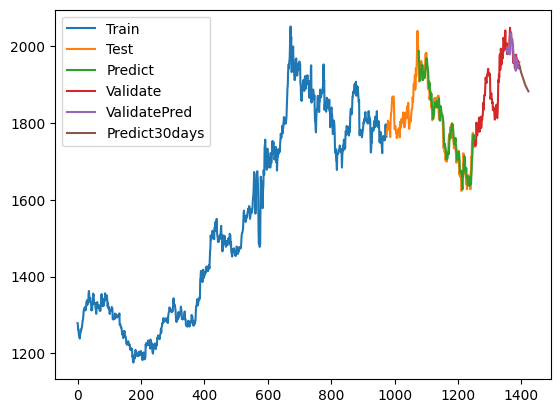

In [23]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

In [24]:
scaler.inverse_transform(lst_output)

array([[1950.91796138],
       [1950.07058459],
       [1946.44661671],
       [1943.05924861],
       [1938.27946338],
       [1934.64761753],
       [1931.79010774],
       [1928.79429011],
       [1926.70506443],
       [1923.89826578],
       [1921.85990775],
       [1918.88819356],
       [1916.96977885],
       [1914.34198215],
       [1911.72279382],
       [1909.436306  ],
       [1906.74225093],
       [1904.02758793],
       [1901.67755468],
       [1899.65625688],
       [1897.64591519],
       [1895.74638672],
       [1894.10688324],
       [1892.39955623],
       [1890.67214301],
       [1889.02345727],
       [1887.35536356],
       [1885.70730388],
       [1884.04390564],
       [1882.47681683]])